In [1]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-06-01 09:18.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.gastrulation_erythroid()
adata

AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

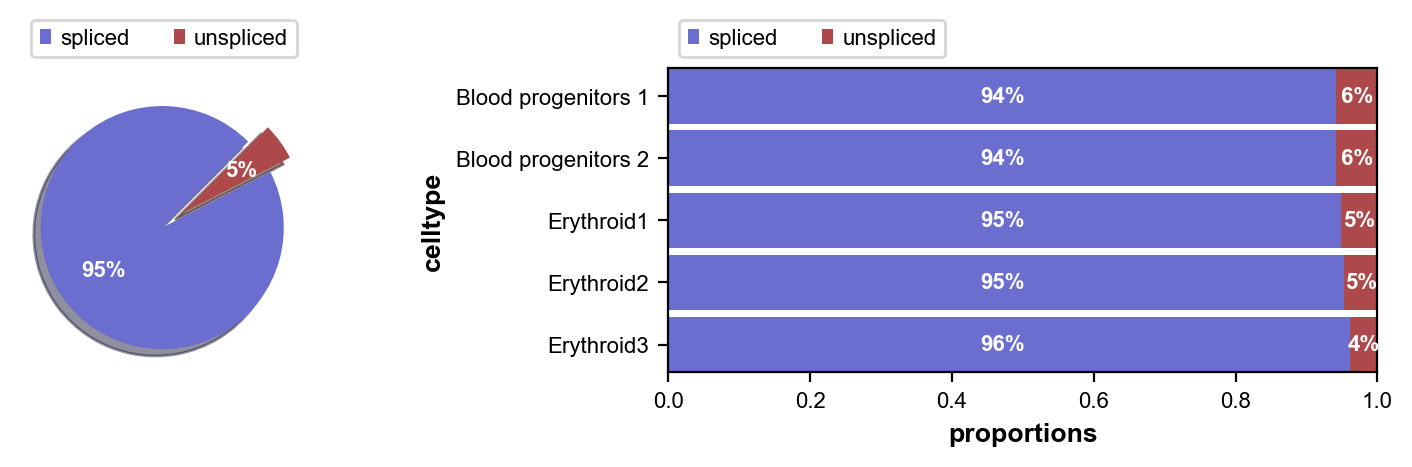

In [4]:
scv.pl.proportions(adata,groupby='celltype')

In [5]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [6]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 51 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:01:21) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [8]:
scv.tl.velocity(adata)
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*Spliced   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


index,Arfgef1,Tram1,Bag2,Uggt1,Rev1,Aff3,Uxs1,Tex30,Kdelc1,Slc39a10,...,Prps1,Alas2,Sh3kbp1,Rbbp7,Gpm6b,Arhgap6,Uty,Ddx3y,Eif2s3y,Gm47283
AAAGATCTCTCGAA,-0.009018,0.001660,0.001479,0.004706,0.125882,-0.726733,0.012664,0.000685,0.090545,-0.000727,...,0.000333,-0.000214,-0.068245,0.002660,0.000300,0.250951,-0.091119,0.252184,0.004855,0.018599
AATCTCACTGCTTT,0.002260,0.002504,-0.000846,0.012851,-0.058758,-2.113834,0.005256,0.000171,0.043131,-0.004913,...,0.000788,0.000029,-0.050014,0.002156,-0.005845,-0.196865,-0.242451,0.130326,-0.024001,0.001450
AATGGCTGAAGATG,0.007599,0.002108,0.001200,-0.002127,0.070350,-1.184824,-0.004209,0.000379,-0.013562,-0.001411,...,0.000199,0.000048,-0.032296,0.001406,-0.003534,0.103089,-0.038204,0.009890,-0.003216,0.039080
ACACATCTGTCAAC,-0.012652,0.000620,0.000100,-0.000053,-0.253096,-0.450874,0.002722,0.000234,-0.062593,0.000469,...,0.000681,0.000031,-0.013340,-0.000279,0.000376,-0.064943,-0.049778,-0.113207,-0.015627,0.009699
ACGACAACTGGAGG,0.003081,-0.002501,0.001593,0.012090,-0.017267,-0.511037,0.010932,0.000521,-0.059165,-0.000418,...,0.000569,0.000033,0.022423,0.000260,0.000696,0.427487,-0.037222,-0.317148,0.001216,0.005056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCACGACTGGTA,-0.006035,0.001526,0.000691,0.001905,-0.414584,0.000000,0.003929,0.000304,-0.031506,-0.003496,...,0.000527,0.000193,-0.004979,0.002133,0.000000,0.322814,0.000000,-0.311480,0.002329,0.000191
TTTCAGTGCGAGTT,-0.014265,-0.000523,0.001463,-0.001357,0.049493,-0.315530,0.001790,0.000277,-0.140004,-0.001604,...,-0.000002,0.000037,-0.024427,0.001918,0.000000,-0.045499,0.000000,-0.606460,0.002206,-0.027320
TTTCGAACGGTGAG,-0.003736,0.001034,0.001265,-0.017093,-0.251792,-0.149193,-0.002196,-0.000161,-0.055117,0.000072,...,0.000249,0.000513,0.000000,0.003224,0.000000,0.061231,-0.047421,-0.757080,-0.005746,0.001834
TTTCGAACTAACCG,0.008164,0.002181,0.001802,-0.000451,-0.419035,0.000000,-0.013566,0.000336,-0.044051,0.000000,...,0.000333,0.000466,0.003216,0.003151,0.000000,0.000000,-0.276887,-0.579508,0.005020,0.006041


In [9]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:02:31) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:02) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


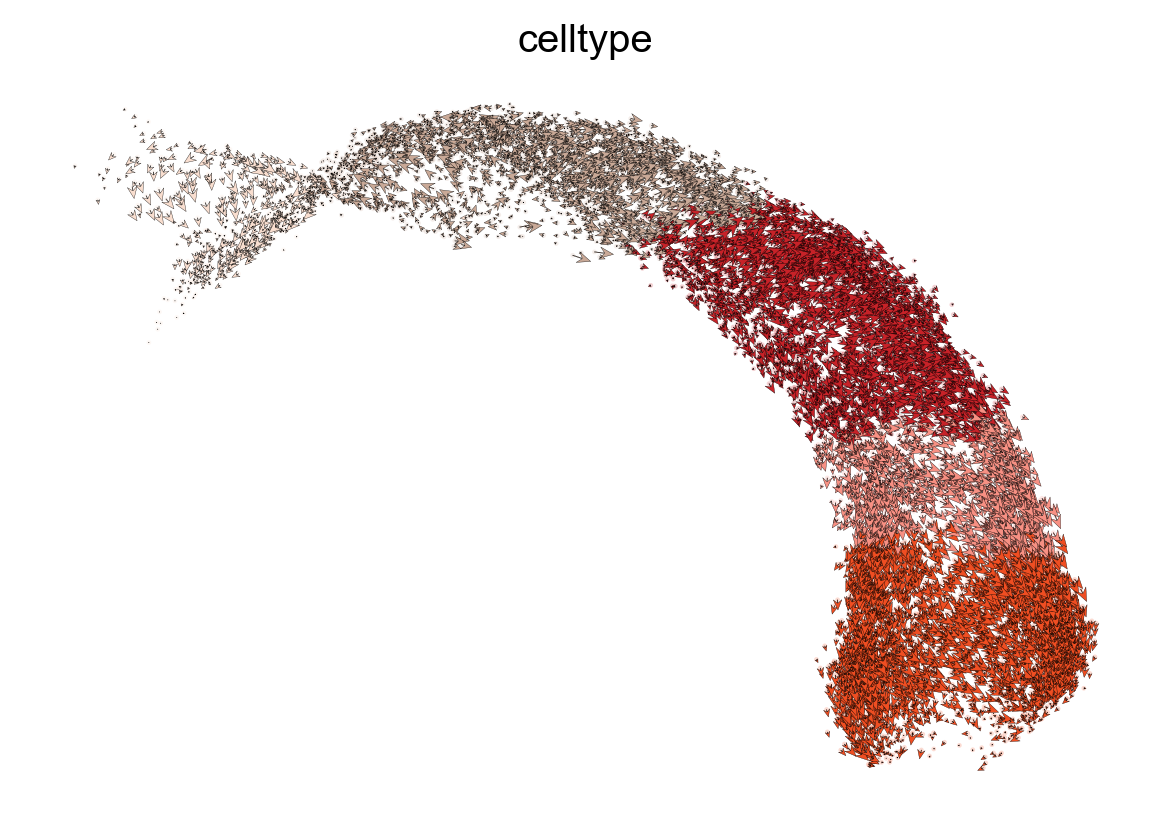

In [10]:
mc.acc_embedding(adata, color="celltype", arrow_length=3, arrow_size=2, dpi=120)

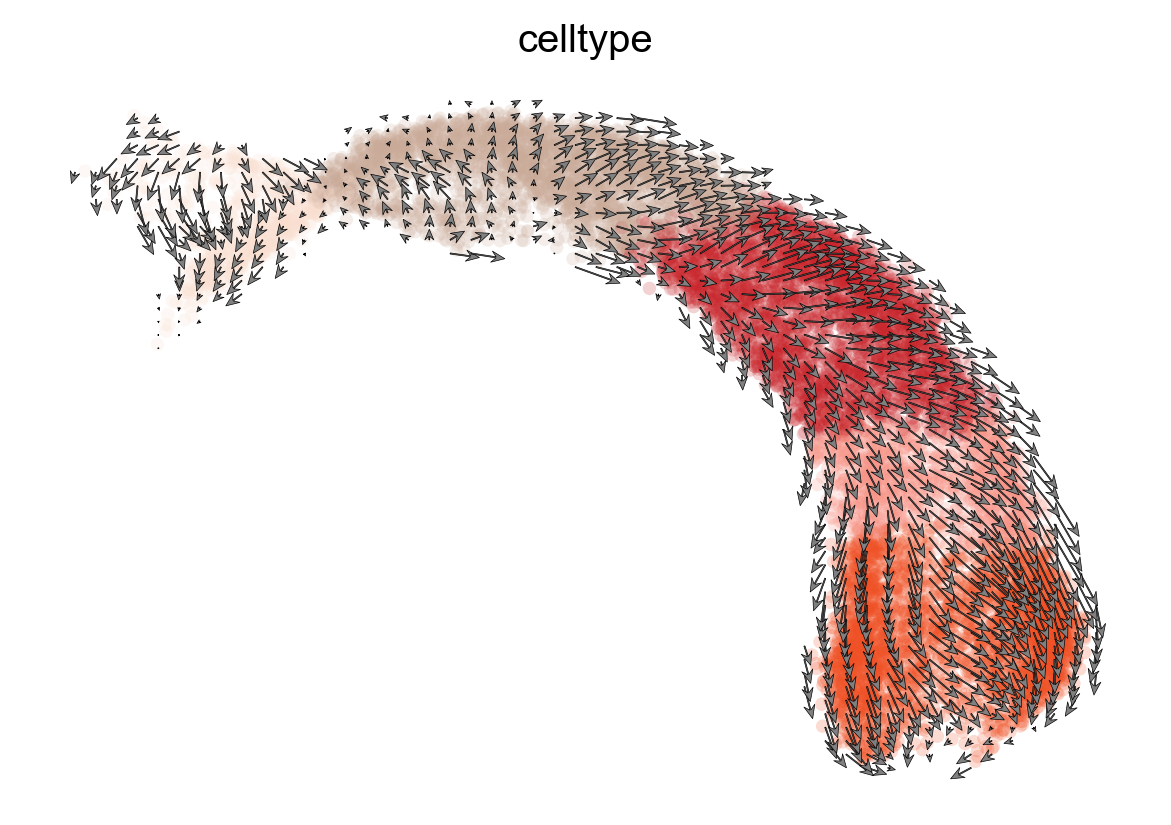

In [11]:
mc.acc_embedding_grid(adata,color="celltype", arrow_length=3, arrow_size=2, dpi=120)

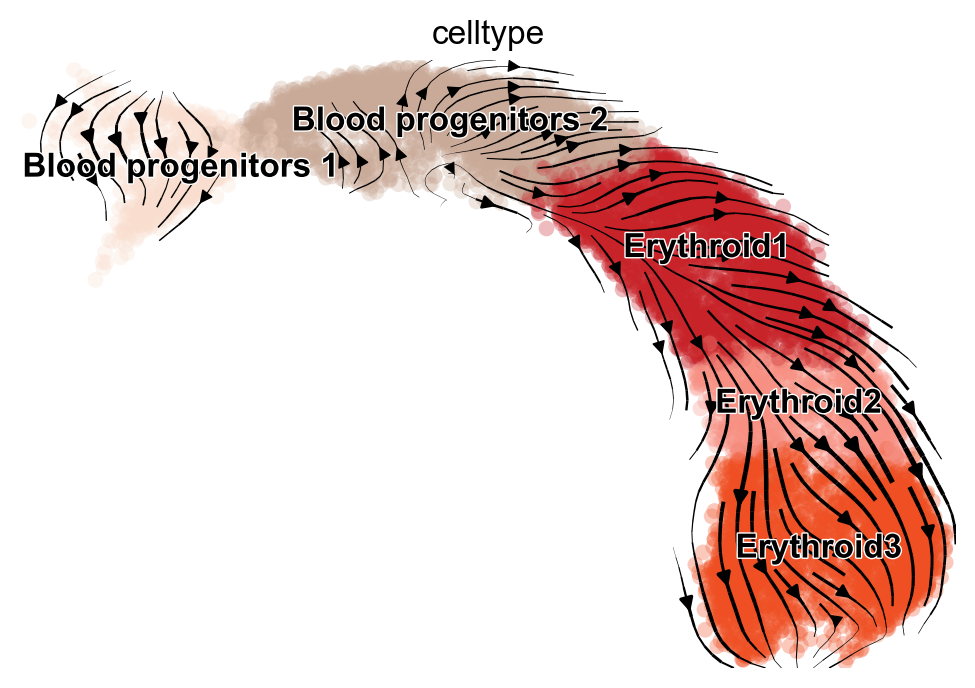

In [12]:
mc.acc_embedding_stream(adata,color="celltype")

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


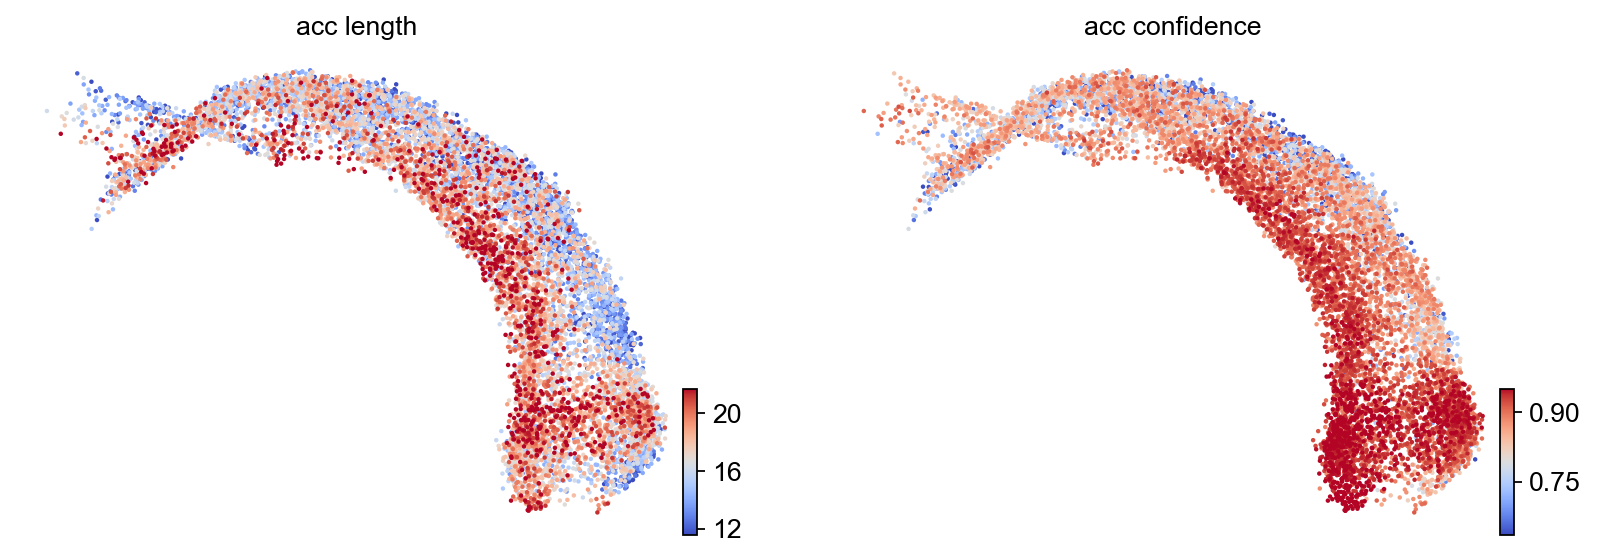

In [13]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

In [14]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

mt.paga(adata, groups='celltype')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['acc_pseudotime']


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [ ]:
adata

In [ ]:
adata.obs